# Linear Regression

## Imports

In [219]:
import random
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

## Load data

Define the path to the file containing the data

In [220]:
datafile = "lausanne-appart.csv"

Read the data

In [221]:
dataset = pd.read_csv(datafile)

Display first rows

In [222]:
dataset.head()

,living_area,nb_rooms,rent_price
0,69,3.0,1810
1,95,3.5,2945
2,21,1.5,685
3,20,1.0,720
4,33,1.5,830


In [223]:
# get numpy arrays from panda objects
rent_price = dataset.rent_price.values
living_area = dataset.living_area.values
print(type(rent_price))
print(rent_price.shape, living_area.shape)

<class 'numpy.ndarray'>
(201,) (201,)


## Part 1 - Visualize the data

a) Plot a histogram to visualize the distribution of the renting price

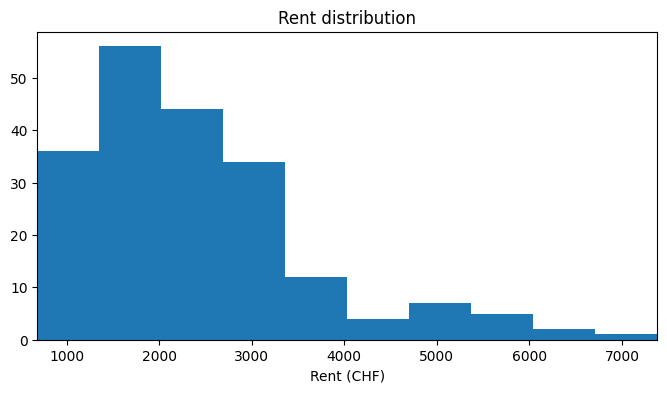

In [224]:
plt.figure(1, figsize=(8, 4))
plt.hist(rent_price)
plt.xlabel("Rent (CHF)")
plt.title("Rent distribution")
plt.xlim(np.min(rent_price), np.max(rent_price))
plt.show()

b) Plot a histogram to visualize the distribution of the living area

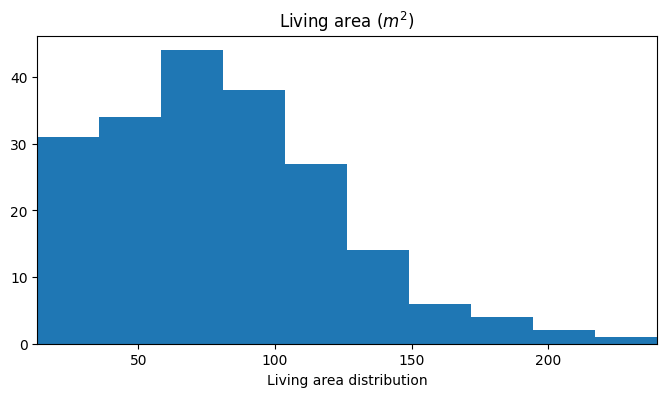

In [225]:
plt.figure(1, figsize=(8, 4))
plt.hist(living_area)
plt.xlabel("Living area distribution")
plt.title("Living area ($m^2$)")
plt.xlim(np.min(living_area), np.max(living_area))
plt.show()

c) Plot a scatter plot of renting price as a function of living area

Text(0, 0.5, 'Renting price (CHF)')

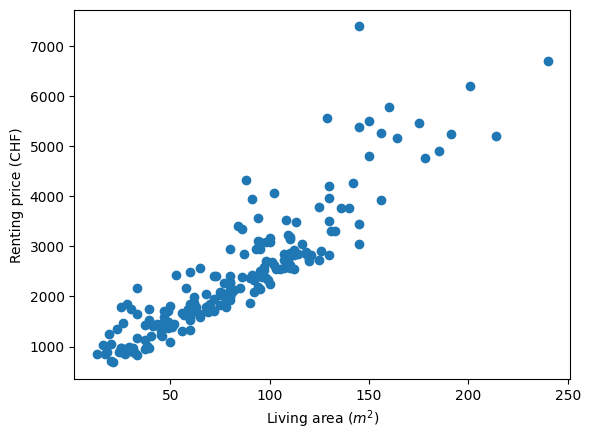

In [226]:
plt.scatter(living_area, rent_price)
plt.xlabel("Living area ($m^2$)")
plt.ylabel("Renting price (CHF)")

## Part 2 - Normal equations for linear regression - using numpy arrays

a) Implement the closed form solution to this problem using the following normal equation:

<div><div style="display: table-cell; width: 100%;"><center>$\theta = (X^{T}X)^{-1}X^{T}\vec{y}$</center></div><div style="display: table-cell; width: 100%;">$(3)$</div></div>

Assuming $x$ is the living area and $y$ is the renting price. Use `numpy` for the vector operations. Plot the computed line on top of the scatter plot of Part 1.

240.07710726596173 26.332424571995666


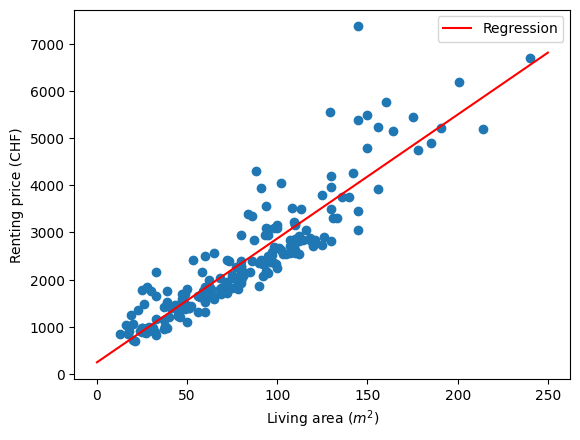

In [227]:
#######################################################################
# TODO:                                                               #
# Perform the following computation                                   #
#  - get N, the number of samples                                     #
#  - compose X with the 1st column full of 1.0 and the 2nd column     #
#    with the living area (hint: have a look to no.ones() and         #
#    np.column_stack()                                                #
#  - get y as the rent prices                                         #
#  - compute the theta (hint: matrix A to matrix B multiplication can #
#    be done with A.dot(B))                                           #
#  - plot the line (hint: compute a set of x points linearly spaced   #
#    and, with the thetas, compute the corresponding y values)        #
#######################################################################
# Define N, X and y
N = len(dataset)
X = np.column_stack((np.ones(shape=(N)), living_area))
y = rent_price

# Calculate values
Xt = np.transpose(X)
#theta = ((Xt.dot(X))**-1).dot(Xt)*y
theta = np.linalg.inv(Xt.dot(X)).dot(Xt).dot(y)
theta_0, theta_1 = theta
x_lin = np.linspace(start=0, stop=250, num=25)
y_fitted = theta_1*x_lin + theta_0
print(theta_0, theta_1)

# Plot values
plt.scatter(living_area, rent_price)
plt.xlabel("Living area ($m^2$)")
plt.ylabel("Renting price (CHF)")
plt.plot(x_lin, y_fitted, 'r', label='Regression')
plt.legend()
plt.show()
#######################################################################
#                         END OF YOUR CODE                            #
#######################################################################

b) Compute the MSE loss according to the following equation:

<div><div style="display: table-cell; width: 100%;"><center>$J(\theta) = \frac{1}{2N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})^{2}$</center></div><div style="display: table-cell; width: 100%;">$(2)$</div></div>

In [228]:
#######################################################################
# TODO:                                                               #
#  - define a function h_theta(x, theta_0, theta_1) to compute the    #
#    the hypothesised values of y (the "y_hat")                       #
#  - define a function mse_loss(x, y, y_hat)                          #
#  - use both functions to compute the MSE loss on the dataset        #
#######################################################################
def h_theta(x, theta_0, theta_1):
    return theta_1*x + theta_0

def mse_loss(x, y, y_hat):
    N = len(y)
    mse_loss = 1/(2*N) * np.sum((y-y_hat)**2)
    return mse_loss

x = living_area    
y_hat = h_theta(x=x, theta_0=theta_0, theta_1=theta_1)
mse = mse_loss(x=x, y=y, y_hat=y_hat)
print("MSE loss:", mse)
#######################################################################
#                         END OF YOUR CODE                            #
#######################################################################

MSE loss: 138034.95779787414


## Part 3 - Normal equations for linear regression - using pytorch tensors

Redo the part 2, this time using pytorch tensors.

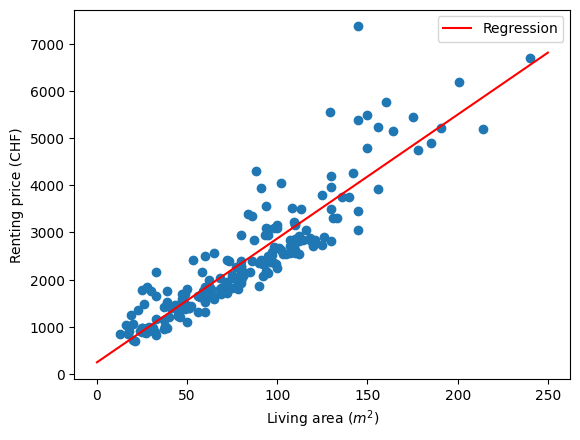

MSE loss: 138034.9577979311


In [229]:
#######################################################################
# TODO:                                                               #
# Perform the following computation                                   #
#  - in a similar way as in the previous part 2, compute theta0 and   #
#    theta1, plot the computed line                                   #
#  - compute the loss J with these new values of theta0 and theta1,   #
#    for that you may use mse_loss() function defined abouve          #
#######################################################################
import torch

ts_rent_price = torch.tensor(dataset.rent_price.values)
ts_living_area = torch.tensor(dataset.living_area.values)

# Linear regression with tensorflow
N = len(rent_price)
x, y = torch.empty((N, 2)), torch.empty((N, 1))
x[:, 0] = ts_living_area
x[:, 1] = 1
y[:, 0] = ts_rent_price
alpha = torch.linalg.lstsq(x, y).solution
m, b = alpha[0, 0].item(), alpha[1, 0].item()

# Precalculations for plotting
x_lin = np.linspace(start=0, stop=250, num=25)
y_fitted = m*x_lin + b

# Plot values
plt.scatter(living_area, rent_price)
plt.xlabel("Living area ($m^2$)")
plt.ylabel("Renting price (CHF)")
plt.plot(x_lin, y_fitted, 'r', label='Regression')
plt.legend()
plt.show()

# MSE calculation
y_hat = h_theta(x=ts_living_area.numpy(), theta_0=b, theta_1=m)
mse = mse_loss(x=ts_living_area.numpy(), y=ts_rent_price.numpy(), y_hat=y_hat)
print("MSE loss:", mse)
#######################################################################
#                         END OF YOUR CODE                            #
#######################################################################